In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [33]:
x = np.linspace(-5.0,5.0,100)

#equation of circle

y = np.sqrt(10**2 - x**2)

y = np.hstack([y, -y])
x = np.hstack([x, -x])

In [34]:
x1 = np.linspace(-5.0,5.0,100)
y1 = np.sqrt(5**2 - x1**2)

y1 = np.hstack([y1, -y1])
x1 = np.hstack([x1, -x1])

<AxesSubplot:>

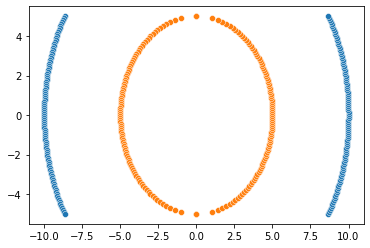

In [35]:
sns.scatterplot(x = y, y = x)
sns.scatterplot(x = y1, y = x1)

since the points are overlapping so we cannot draw the best fit line or the linear line and the accuracy will be very very low

converting the x and y features into the df and assigning one class and 0 class

In [36]:
#indep features
df1 = pd.DataFrame(np.vstack([y,x]).T, columns = ['X1', 'X2'])
df1['Y'] = 0 #output class

df2 = pd.DataFrame(np.vstack([y1,x1]).T, columns = ['X1', 'X2'])
df2['Y'] = 1 #output class

df = pd.concat([df1,df2])
df

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0
...,...,...,...
195,-1.969049,-4.59596,1
196,-1.714198,-4.69697,1
197,-1.406908,-4.79798,1
198,-0.999949,-4.89899,1


In [37]:
#divide into indp and dep features

X = df.iloc[:, :2]
X

,X1,X2
0,8.660254,-5.00000
1,8.717792,-4.89899
2,8.773790,-4.79798
3,8.828277,-4.69697
4,8.881281,-4.59596
...,...,...
195,-1.969049,-4.59596
196,-1.714198,-4.69697
197,-1.406908,-4.79798
198,-0.999949,-4.89899


In [38]:
y = df.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Y, Length: 400, dtype: int64

In [39]:
#spilt into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=0)

In [31]:
from sklearn.svm import SVC

sv = SVC(kernel = 'linear')
sv.fit(X_train, y_train)

SVC(kernel='linear')

In [13]:
from sklearn.metrics import accuracy_score

y_pred = sv.predict(X_test)
accuracy_score(y_test, y_pred)

0.45

### Polynomial Kernel

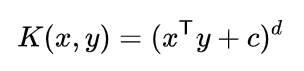

the important components which came out after multiplication are x1^2 x1*x2 x2^2

In [14]:
df['X1^2'] = df['X1']**2
df['X2^2'] = df['X2']**2
df['X1*X2'] = (df['X1'] * df['X2'])
df

,X1,X2,Y,X1^2,X2^2,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009
...,...,...,...,...,...,...
195,-1.969049,-4.59596,1,3.877155,21.122845,9.049671
196,-1.714198,-4.69697,1,2.938476,22.061524,8.051537
197,-1.406908,-4.79798,1,1.979390,23.020610,6.750316
198,-0.999949,-4.89899,1,0.999898,24.000102,4.898740


In [16]:
### Independent and Dependent features
X = df[['X1','X2','X1^2','X2^2','X1*X2']]
y = df['Y']

y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Y, Length: 400, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

X_train

,X1,X2,X1^2,X2^2,X1*X2
50,4.999745,0.050505,24.997449,0.002551,0.252512
63,9.906589,1.363636,98.140496,1.859504,13.508984
112,-3.263736,3.787879,10.651974,14.348026,-12.362637
159,-9.953852,-0.959596,99.079176,0.920824,9.551676
83,3.680983,3.383838,13.549638,11.450362,12.455852
...,...,...,...,...,...
123,-4.223140,2.676768,17.834915,7.165085,-11.304366
192,-9.031653,-4.292929,81.570758,18.429242,38.772248
117,-9.445795,3.282828,89.223038,10.776962,-31.008922
47,9.996811,-0.252525,99.936231,0.063769,-2.524447


In [20]:
import plotly.express as px

fig = px.scatter_3d(df, x='X1', y='X2', z='X1*X2',
              color='Y')
fig.show()



#from figure we can see that we cannot create a plane since the points are overlapped

In [21]:
fig = px.scatter_3d(df, x='X1^2', y='X2^2', z='X1*X2',
              color='Y')
fig.show()

#since the points are easily classified in higher dimension so we'll draw a plane between them

Now if we apply linear kernel it will easily draw a linear line and its accuracy will be highest

In [22]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

If we dont want to seperate variables by applying formula of polynomial kernel we can easily implement **rbf** kernels they work very well with the non - linear data for that purpose i didnt ran the linear kernel cells and directly jumped onto the rbf

In [40]:
classifier = SVC(kernel="rbf")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0